# builtin.com analysis example

The following is a brief and simple analysis of Data+Analytics jobs using the data scraped from the builtin.com website using builtin-datajob-scraper.
The data is read by a manually updated sqlite database but it is also possible to read the csv files created by the program.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
con = sqlite3.connect('manualdb.db')
#cur = con.cursor()
#cur.execute("SELECT * FROM builtinjobs")

**Join example**

In [3]:

q = ('SELECT position, c.name, location, sub1.name AS subcategory_1, sub2.name AS subcategory_2, sub3.name AS subcategory_3, ind1.name AS industry_1, ind2.name AS industry_2, ind3.name AS industry_3 ' 
     'FROM jobs '
     'LEFT JOIN subcategory AS sub1 ON subcategory_1 = sub1.id ' 
     'LEFT JOIN subcategory AS sub2 ON subcategory_2 = sub2.id '
     'LEFT JOIN subcategory AS sub3 ON subcategory_3 = sub3.id '
     'LEFT JOIN industry AS ind1 ON industry1 = ind1.id '
     'LEFT JOIN industry AS ind2 ON industry2 = ind2.id '
     'LEFT JOIN industry AS ind3 ON industry3 = ind3.id '
     'LEFT JOIN company AS c ON company = c.id')
df = pd.read_sql_query(q,con)
df

,position,name,location,subcategory_1,subcategory_2,subcategory_3,industry_1,industry_2,industry_3
0,"Senior Analyst, Investment Operations",Morningstar,Chicago,Analysis & Reporting,None,None,Enterprise Web,Fintech,None
1,Information Security - Senior Risk Analyst,Motorola Solutions,Chicago,Analytics,None,None,Hardware,Software,None
2,"Remote, Manager Data Management",eClinical Solutions,Greater Boston Area,Data Engineering,Management,None,Cloud,Healthtech,Professional Services
3,Principal Data Engineer,eClinical Solutions,Greater Boston Area,Data Engineering,None,None,Cloud,Healthtech,Professional Services
4,"Business Analyst, Clinical Research Software",eClinical Solutions,Greater Boston Area,Business Intelligence,None,None,Cloud,Healthtech,Professional Services
...,...,...,...,...,...,...,...,...,...
4669,"Software Engineer, Data Platform",Nuna,San Francisco,Data Engineering,None,None,Healthtech,None,None
4670,Sr. Analytics Engineer,Eaze,San Francisco,Analytics,Data Engineering,None,Cannabis,None,None
4671,Senior Data Scientist,Step,Peninsula,Data Science,None,None,Fintech,None,None
4672,Senior Data Engineer,Mosaic,East Bay,Data Engineering,None,None,Fintech,Greentech,None


**Number of Healthcare job offers by region**

<AxesSubplot:xlabel='count', ylabel='location'>

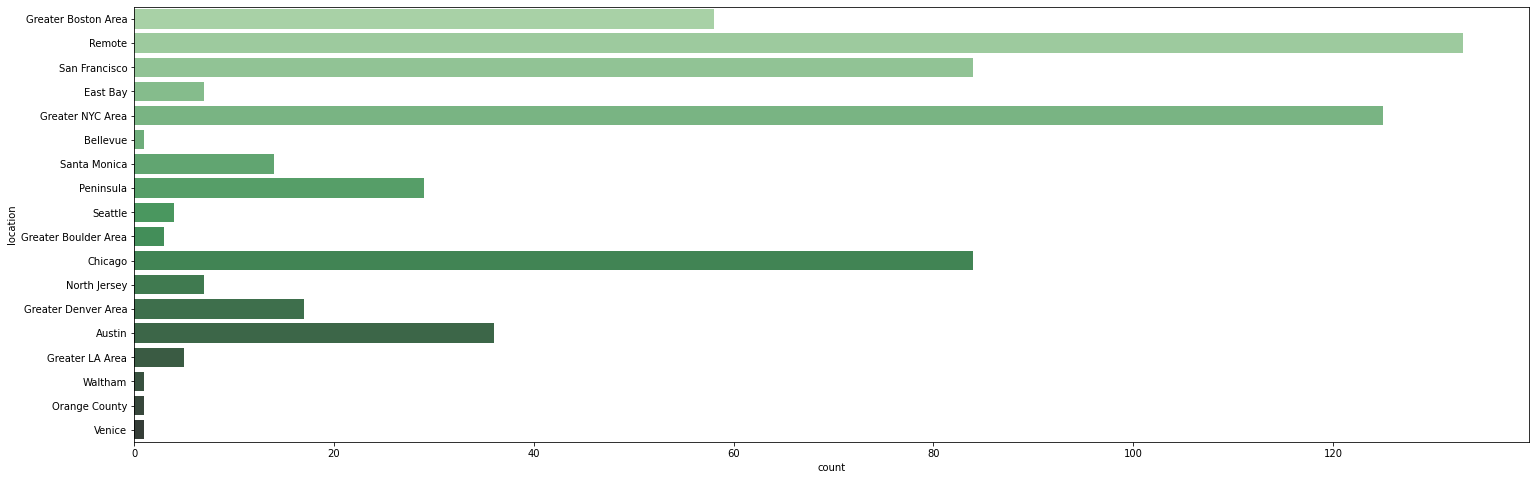

In [4]:
q = ('SELECT position, c.name, location, ind1.name AS industry_1, ind2.name AS industry_2, ind3.name AS industry_3 ' 
     'FROM jobs '
     'LEFT JOIN industry AS ind1 ON industry1 = ind1.id '
     'LEFT JOIN industry AS ind2 ON industry2 = ind2.id '
     'LEFT JOIN industry AS ind3 ON industry3 = ind3.id '
     'LEFT JOIN company AS c ON company = c.id '
     'WHERE ind1.name = "Healthtech" OR ind2.name = "Healthtech"'
    )
df = pd.read_sql_query(q,con)
plt.figure(figsize=(25, 8))
sns.countplot(y='location',data=df, palette="Greens_d")

**Industries recurrencies**

In [5]:
q = ('SELECT ind1.name AS industry1_name,COUNT(ind1.name) AS industry_1_count ' 
     'FROM jobs '
     'LEFT JOIN industry AS ind1 ON industry1 = ind1.id '
     'GROUP BY ind1.name '
     'ORDER BY industry_1_count DESC'
    )
df = pd.read_sql_query(q,con)
df.head()

,industry1_name,industry_1_count
0,Fintech,709
1,eCommerce,443
2,Cloud,429
3,Healthtech,375
4,Big Data,357


<AxesSubplot:xlabel='industry1_name', ylabel='industry_1_count'>

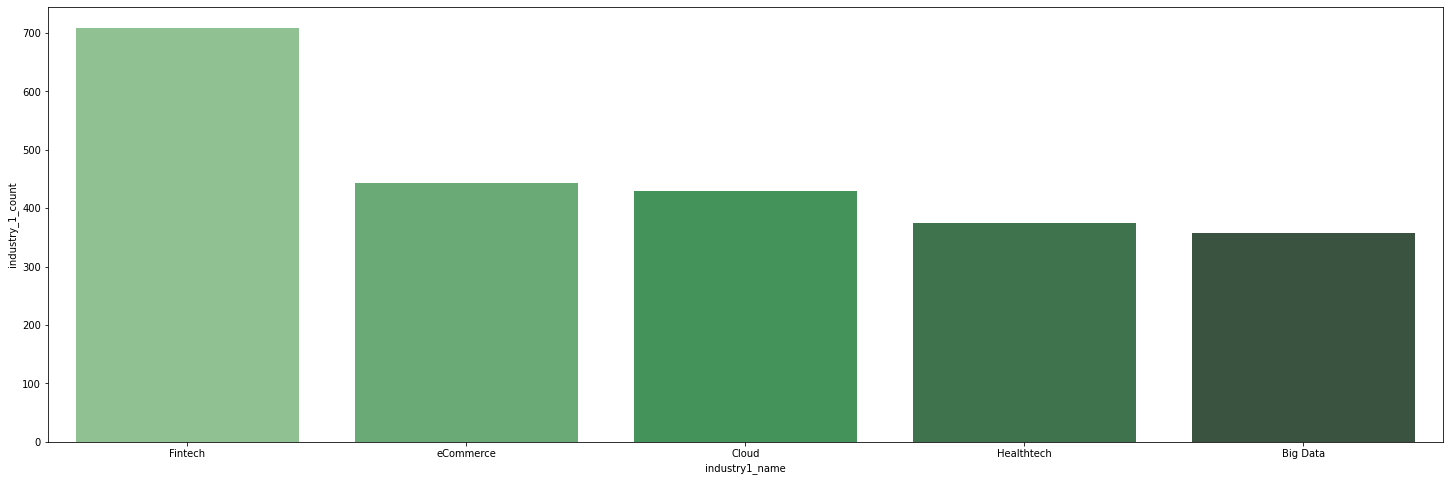

In [6]:
plt.figure(figsize=(25, 8))
sns.barplot(x='industry1_name',y='industry_1_count',data=df.head(), palette="Greens_d")

**Healthcare industry/subcategory combination**

In [7]:
q = ('SELECT ind1.name, sub1.name AS subcategory_1, COUNT() AS count ' 
     'FROM jobs '
     'LEFT JOIN industry AS ind1 ON industry1 = ind1.id '
     'LEFT JOIN subcategory AS sub1 ON subcategory_1 = sub1.id ' 
     'LEFT JOIN subcategory AS sub2 ON subcategory_2 = sub2.id '
     'WHERE ind1.name = "Healthtech" '
     'GROUP BY ind1.name,subcategory_1,subcategory_2 '
     'ORDER BY count DESC'
    )
df = pd.read_sql_query(q,con)
df.head()

,name,subcategory_1,count
0,Healthtech,Data Engineering,93
1,Healthtech,Analytics,48
2,Healthtech,Other,34
3,Healthtech,Data Science,32
4,Healthtech,Analysis & Reporting,31


<AxesSubplot:xlabel='subcategory_1', ylabel='count'>

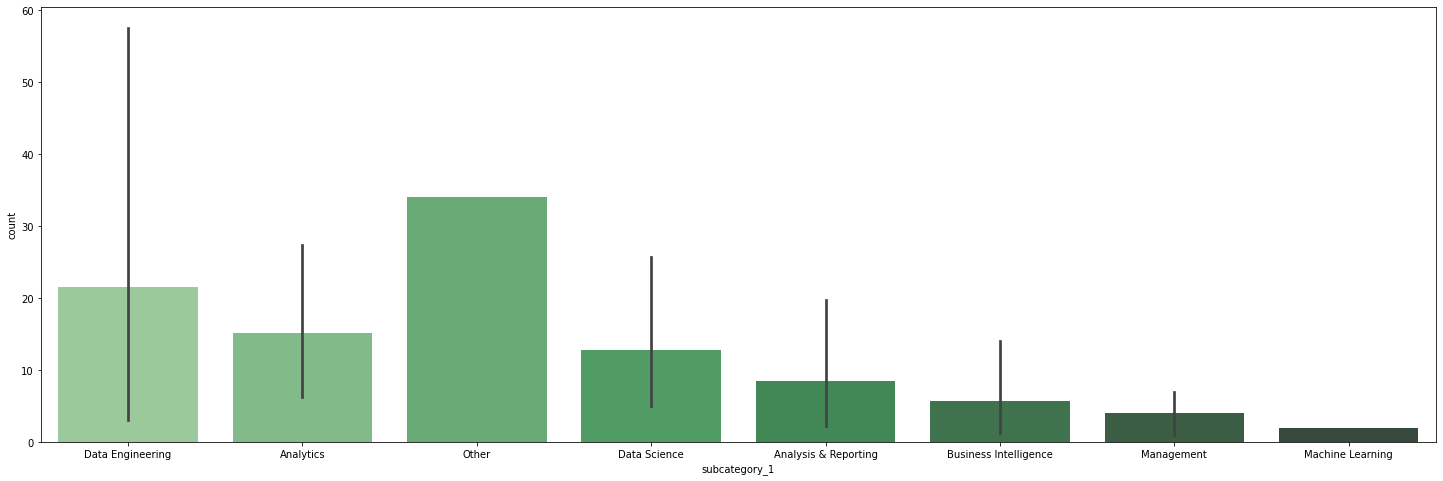

In [8]:
plt.figure(figsize=(25, 8))
sns.barplot(x='subcategory_1',y='count',data=df, palette="Greens_d")